In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import numpy as np

In [2]:
model = tf.keras.models.load_model('./models/version5/')

In [6]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters,biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
conv2d_2 (3, 3, 32, 32)
conv2d_3 (3, 3, 32, 32)
conv2d_4 (3, 3, 32, 32)
conv2d_5 (3, 3, 32, 32)


In [9]:
filters, biases = model.layers[1].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

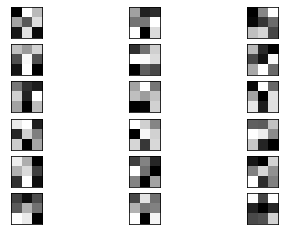

In [10]:
n_filters, ix = 6,1
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
plt.show()

In [21]:
image_path = './model_data/dry/al_original_cctv_16-al.jpeg_08db6ac4-5be9-4c68-a940-2895f22fd3f2.jpeg'

# Loading image with keras
image = tf.keras.preprocessing.image.load_img(image_path)
# Turning it into an array
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])

In [17]:
new_model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [22]:
features = new_model.predict(input_arr)

1/1 [==============================] - 0s 39ms/step


In [23]:
features.shape

(1, 298, 298, 32)

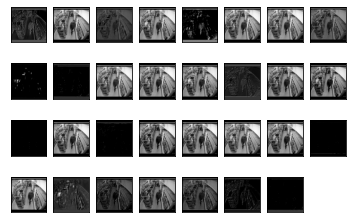

In [27]:
ix = 1
for _ in range(4):
    for _ in range(8):

        if ix < 32:
            ax = plt.subplot(4,8,ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(features[0, :, :, ix-1], cmap='gray')
            ix += 1
        else:
            break
plt.show()